In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
#change directory

%cd /content/drive/MyDrive/Math_6397/CH01  

/content/drive/MyDrive/Math_6397/CH01


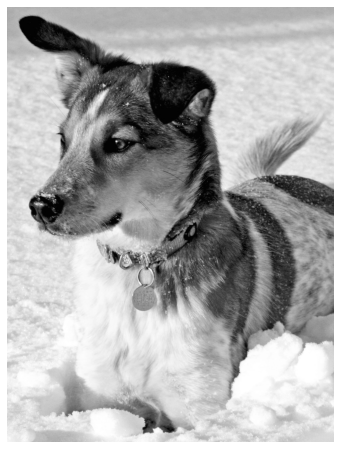

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [4]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S=np.diag(S)

In [15]:
for r in (5, 20, 100):
    # Construct approximate image
    Xr = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    er=np.linalg.norm(X-Xr, 'fro')/ np.linalg.norm(X, 'fro')
    variance=er*er
    print(er,variance)

0.16178479498941975 0.026174319889768576
0.0878625038509914 0.007719819582965478
0.03691971485030313 0.0013630653446276937


In [16]:
def error(r):
  Xr = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
  er=np.linalg.norm(X-Xr, 'fro')/ np.linalg.norm(X, 'fro')
  variance=er*er
  return(er,variance)

In [17]:
Err=[]
var=[]
cumsum=[]
r_val=[]

for i in range(1, 1500, 5):
  er,variance=error(i)
  Err.append(1-er)
  var.append(1-variance)
  cumsum.append(np.cumsum(np.diag(S))[i-1]/np.sum(np.diag(S)))
  r_val.append(i)

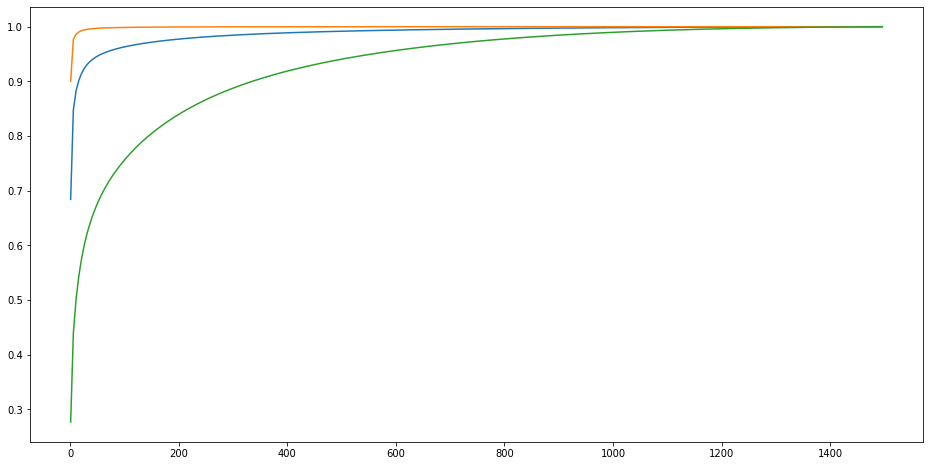

In [18]:
plt.plot(r_val, Err)
plt.plot(r_val, var)
plt.plot(r_val, cumsum)